In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [8]:
# Define the directory where your dataset is located
dataset_dir = "Automatic_PCOS_Detection_Using_Ultrasound_images/processed_images"

KNN MODEL
Accuracy: 0.9138
Precision: 0.9138
Recall: 0.9138
F1 Score: 0.9138


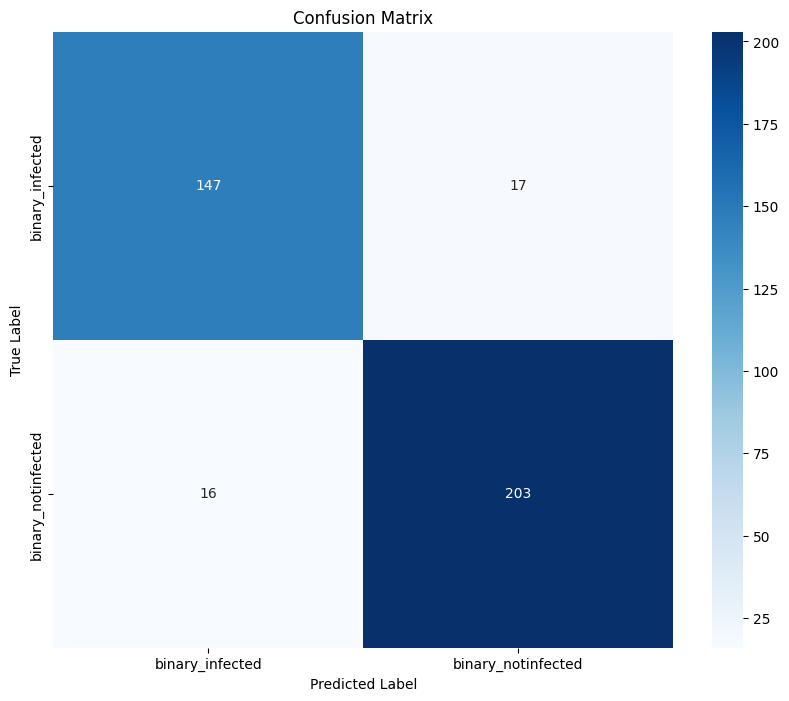

In [9]:
# Initialize lists to store image data and corresponding labels
X = []  # Image data
y = []  # Labels

# Batch processing parameters
batch_size = 100  # Adjust as needed


# Load and preprocess images in batches
images_batch = []  # Initialize batch list
labels_batch = []  # Initialize label list
for class_folder in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_folder)
    if os.path.isdir(class_path):
        label = class_folder  # Use the folder name as the label
        for image_file in os.listdir(class_path):
            if image_file.endswith(".jpg") or image_file.endswith(".jpeg") or image_file.endswith(".png"):  # Assuming your images are in JPG format
                image_path = os.path.join(class_path, image_file)
                image = cv2.imread(image_path)
                if image is not None:
                    # Preprocess the image (e.g., resize to a fixed size)
                    # You can also perform other preprocessing steps here
                    image = cv2.resize(image, (64, 64))  # Adjust the size as needed
                    images_batch.append(image)
                    labels_batch.append(label)
                else:
                    print(f"Error loading image: {image_path}")

            # Check if the batch is full
            if len(images_batch) >= batch_size:
                # Convert lists to NumPy arrays and append to the main arrays
                X.append(np.array(images_batch))
                y.extend(labels_batch)
                # Clear the batch lists
                images_batch.clear()
                labels_batch.clear()

# Convert any remaining images to NumPy arrays and append to the main arrays
if images_batch:
    X.append(np.array(images_batch))
    y.extend(labels_batch)

# Check the number of images loaded
#print(f"Number of images loaded: {sum(len(batch) for batch in X)}")

# Check the number of labels
#print(f"Number of labels: {len(y)}")

# Convert lists to NumPy arrays
if X:
    X = np.concatenate(X, axis=0)
    y = np.array(y)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the k-NN classifier
    k = 2  # Choose an appropriate value for k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train.reshape(len(X_train), -1), y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test.reshape(len(X_test), -1))

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("KNN MODEL")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
else:
    print("No images found. Ensure that the dataset directory contains images.")


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

DECISION TREE MODEL
Accuracy: 0.9321
Precision: 0.9321
Recall: 0.9321
F1 Score: 0.9321


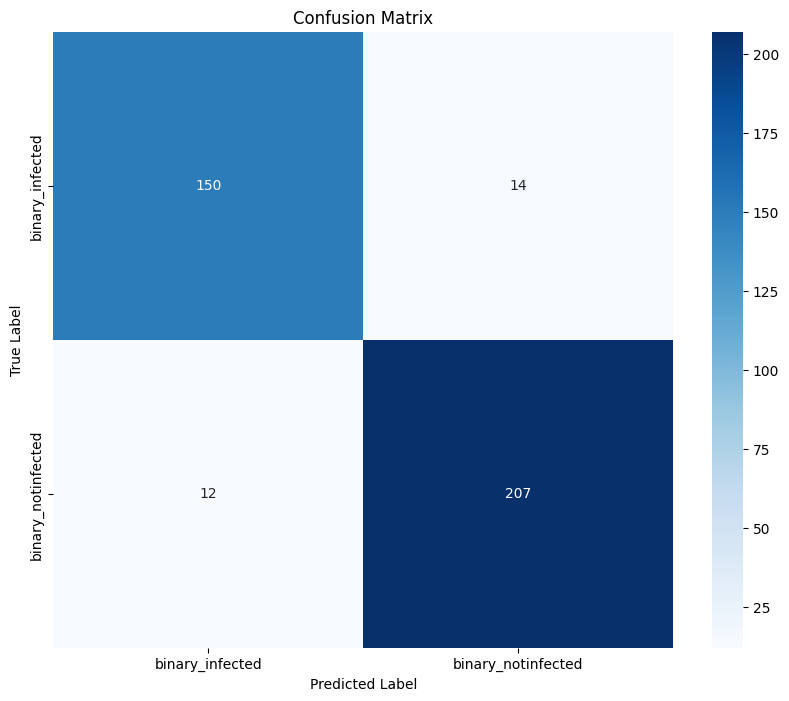

In [10]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Define the directory where your dataset is located
dataset_dir = "Automatic_PCOS_Detection_Using_Ultrasound_images/processed_images"

# Initialize lists to store image data and corresponding labels
X = []  # Image data
y = []  # Labels

# Supported image file extensions
valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']

# Load and preprocess images
for class_folder in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_folder)
    if os.path.isdir(class_path):
        label = class_folder  # Use the folder name as the label
        for image_file in os.listdir(class_path):
            file_extension = os.path.splitext(image_file)[-1].lower()
            if file_extension in valid_extensions:
                image_path = os.path.join(class_path, image_file)
                image = cv2.imread(image_path)
                # Preprocess the image (e.g., resize to a fixed size)
                # You can also perform other preprocessing steps here
                image = cv2.resize(image, (64, 64))  # Adjust the size as needed
                X.append(image.flatten())  # Flatten the image to create a feature vector
                y.append(label)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA dimensionality reduction
num_components = 175  # Adjust this based on your dataset and requirements
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = decision_tree_classifier.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("DECISION TREE MODEL")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

SVM MODEL
Accuracy: 0.9948
Precision: 0.9948
Recall: 0.9948
F1 Score: 0.9948


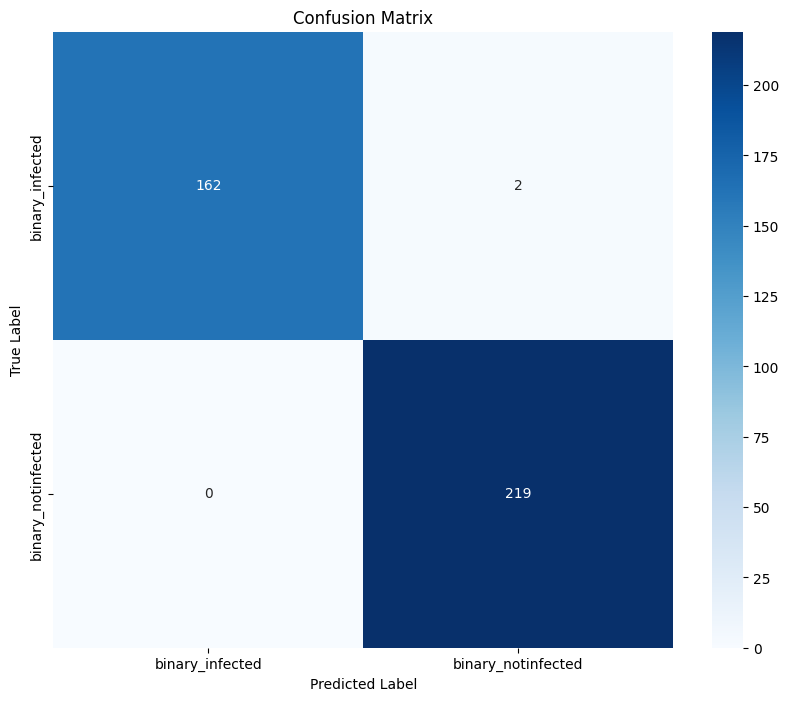

In [11]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the directory where your dataset is located
dataset_dir = "Automatic_PCOS_Detection_Using_Ultrasound_images/processed_images"

# Initialize lists to store image data and corresponding labels
X = []  # Image data
y = []  # Labels

# Supported image file extensions
valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']

# Load and preprocess images
for class_folder in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_folder)
    if os.path.isdir(class_path):
        label = class_folder  # Use the folder name as the label
        for image_file in os.listdir(class_path):
            file_extension = os.path.splitext(image_file)[-1].lower()
            if file_extension in valid_extensions:
                image_path = os.path.join(class_path, image_file)
                image = cv2.imread(image_path)
                # Preprocess the image (e.g., resize to a fixed size)
                # You can also perform other preprocessing steps here
                image = cv2.resize(image, (64, 64))  # Adjust the size as needed
                X.append(image.flatten())  # Flatten the image to create a feature vector
                y.append(label)

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA dimensionality reduction
num_components = 100  # Adjust this based on dataset and requirements
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create and train the SVM classifier on the reduced data
svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set using the reduced data
y_pred = svm_classifier.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("SVM MODEL")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

XGBOOST MODEL
Accuracy: 0.9896
Precision: 0.9896
Recall: 0.9896
F1 Score: 0.9895


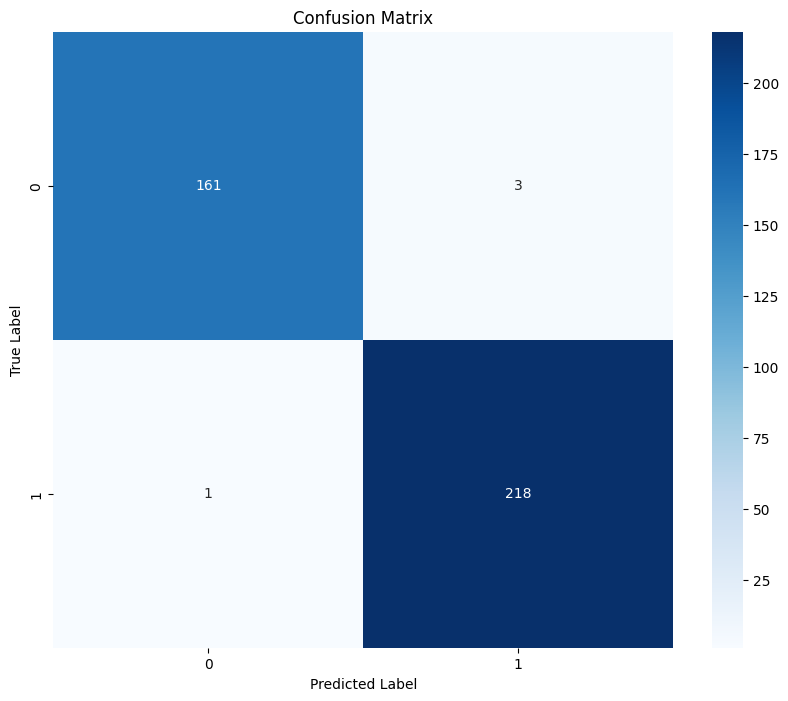

In [12]:
import os
import cv2
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Define the directory where your dataset is located
dataset_dir = "Automatic_PCOS_Detection_Using_Ultrasound_images/processed_images"

# Initialize lists to store image data and corresponding labels
X = []  # Image data
y = []  # Labels

# Supported image file extensions
valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']

# Load and preprocess images
for class_folder in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_folder)
    if os.path.isdir(class_path):
        label = class_folder  # Use the folder name as the label
        for image_file in os.listdir(class_path):
            file_extension = os.path.splitext(image_file)[-1].lower()
            if file_extension in valid_extensions:
                image_path = os.path.join(class_path, image_file)
                image = cv2.imread(image_path)
                # Preprocess the image (e.g., resize to a fixed size)
                # You can also perform other preprocessing steps here
                image = cv2.resize(image, (64, 64))  # Adjust the size as needed
                X.append(image.flatten())  # Flatten the image to create a feature vector
                y.append(label)

# Create a mapping from current labels to binary labels
label_mapping = {'binary_infected': 0, 'binary_notinfected': 1}

# Map the labels to binary format
y = np.array([label_mapping[label] for label in y])

# Convert lists to NumPy arrays
X = np.array(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("XGBOOST MODEL")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

RANDOM FOREST
Accuracy: 0.9791
Precision: 0.9791
Recall: 0.9791
F1 Score: 0.9791


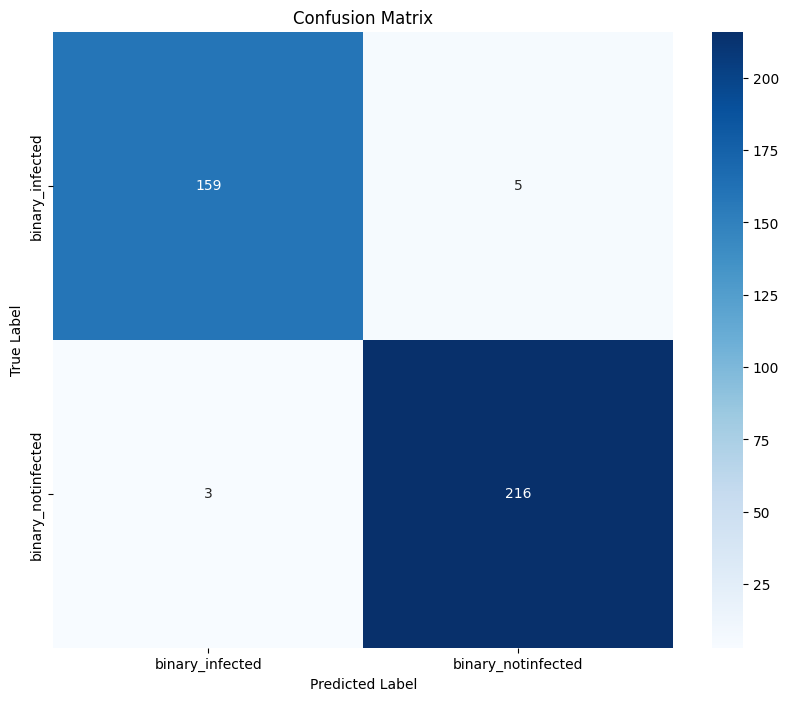

In [13]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Define the directory where your dataset is located
dataset_dir = "Automatic_PCOS_Detection_Using_Ultrasound_images/processed_images"

# Initialize lists to store image data and corresponding labels
X = []  # Image data
y = []  # Labels

# Supported image file extensions
valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']

# Load and preprocess images
for class_folder in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_folder)
    if os.path.isdir(class_path):
        label = class_folder  # Use the folder name as the label
        for image_file in os.listdir(class_path):
            file_extension = os.path.splitext(image_file)[-1].lower()
            if file_extension in valid_extensions:
                image_path = os.path.join(class_path, image_file)
                image = cv2.imread(image_path)
                # Preprocess the image (e.g., resize to a fixed size)
                # You can also perform other preprocessing steps here
                image = cv2.resize(image, (64, 64))  # Adjust the size as needed
                X.append(image.flatten())  # Flatten the image to create a feature vector
                y.append(label)

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA dimensionality reduction
num_components = 50  # Adjust this based on your dataset and requirements
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create and train the Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set using the reduced data
y_pred = random_forest_classifier.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("RANDOM FOREST")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()